In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from yellowbrick.cluster import SilhouetteVisualizer

In [29]:
# !rm ds-abandono.xls
# !wget https://github.com/bdm-unlu/2020/raw/master/TPs/TP05/TP0502/ds-abandono.xls

tuve q instalar __xlrd__ desde pip

In [30]:
data = pd.read_excel("ds-abandono.xls")
data.head()

,legajo,estado_civil,carrera,carrera_grado,sede,anio_ingreso,horas_trabajadas,masculino,femenino,edad_ingreso,...,c_regulares_1er_anio,c_ausentes_1er_anio,c_noausentes_1er_anio,cursadas_ap_1er_anio,cursadas_1er_anio,cambio_universidad,cambio_carrera,progresar_2016,fracaso_academico,activo_2017
0,1,SOLTERO/A,LICENCIATURA EN ENFERMERIA,1,SEDE LUJAN,2016,0,0,1,22,...,4,8,8,4,16,0,1,0,0,0
1,2,UNIDO/A,LICENCIATURA EN TRABAJO SOCIAL,1,SEDE LUJAN,2014,0,0,1,21,...,1,3,1,1,4,0,0,1,0,0
2,3,CASADO/A,LICENCIATURA EN CS. DE LA EDUCACION,1,SEDE LUJAN,2014,0,0,1,54,...,0,2,0,0,2,0,1,0,0,0
3,4,SOLTERO/A,CONTADOR PUBLICO,1,D.A. MERCEDES,2014,0,0,1,28,...,0,2,0,0,2,0,0,0,0,0
4,5,SOLTERO/A,CONTADOR PUBLICO,1,SEDE LUJAN,2016,24,0,1,28,...,1,0,1,1,1,0,0,0,0,1


Los datos que voy a tomar son: horas trabajadas, años en la unlu, anios cursados, c_promociones_1er_anio, c_libres_1er_anio, c_regulares_1er_anio, c_ausentes_1er_anio, cursadas_1er_anio y fracaso academico

Los que busco distintos grupos de alumnos que fracasen o "les vaya bien", ver cuantos grupos de alumnos distintes encuentro y como afectan las horas trabajadas, años cursados y años en la unlu.
Tengas ciertas suposiciones y datos que espero encontrar, como un grupo de alumnos que fallen y tengan muchas materias libres y ausentes, pocas regulares y promociones. tambien supondria q estos alumnos tienen pocos años en la universidad

In [31]:
cols = ["horas_trabajadas","anios_en_unlu","anios_cursados","c_promociones_1er_anio","c_libres_1er_anio","c_regulares_1er_anio","c_ausentes_1er_anio","fracaso_academico"]
reduced = data[cols]
reduced.isnull().sum().sum()

8

In [32]:
reduced[reduced.isna().any(axis=1)]

,horas_trabajadas,anios_en_unlu,anios_cursados,c_promociones_1er_anio,c_libres_1er_anio,c_regulares_1er_anio,c_ausentes_1er_anio,fracaso_academico
92,0,NaN,0,0,0,0,0,0
113,0,NaN,0,0,0,0,0,0
118,0,NaN,0,0,0,0,0,0
4131,24,NaN,0,0,0,0,0,0
4183,25,NaN,0,0,0,0,0,0
4188,40,NaN,0,0,0,0,0,0
5254,0,NaN,0,0,0,0,0,0
10879,0,NaN,0,0,0,0,0,0


dado que tengo un grupo reducido de NaN procedo a reeamplazar el valor por cero al ver los valores para sus otras columnas y pensando en enfocarme en clusterizar y no tanto limpiar los datos.

In [33]:
reduced['anios_en_unlu'] = reduced['anios_en_unlu'].fillna(0)
scaled = scale(reduced)

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


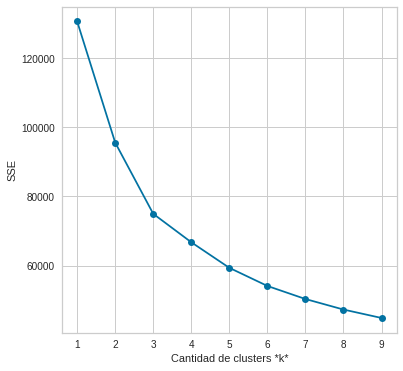

In [34]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

La Curva tiene un buen decrecimiento hasta el tercer cluster y  partir del quinto empieza a achatarse mas.
Es importante destacar que la escala de error en la que estan lo clusters me parece bastante grande.

In [35]:
list_k = list(range(2, 6))
for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score (scaled, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.2711685745419997
For n_clusters =3 silhouette score is 0.3236244109434642
For n_clusters =4 silhouette score is 0.2573397678036564
For n_clusters =5 silhouette score is 0.24790443941350682


El resultado es interesante por que en un principio pensaba encontrar 2 grupos, aquellos que fracasaban y aquellos que no, y el mejor coeficiente de silueta lo tiene con 3 clusters.

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

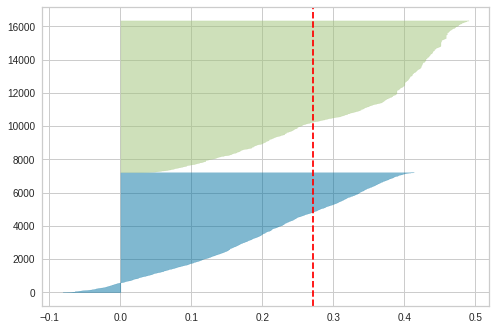

In [36]:
model2 = KMeans(2, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model2, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled)

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

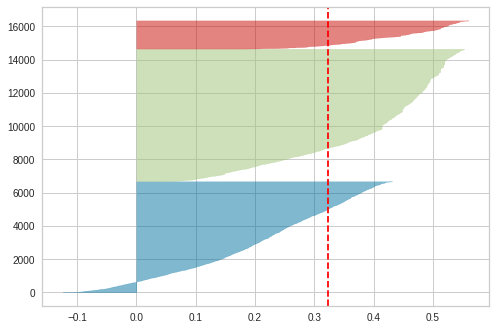

In [37]:
model3 = KMeans(3, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model3, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled)


En ambos casos se ve que un grupo importante queda mal clasificado en el ultimo cluster.
En el caso de 3 clusters en cluster de diferencia es bastante chico y lo que proboca es que el ultimo clusters tenga registros peor asignados que en el caso de 2 clusters.

Voy a probar como se ve la silueta con mas clusters

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

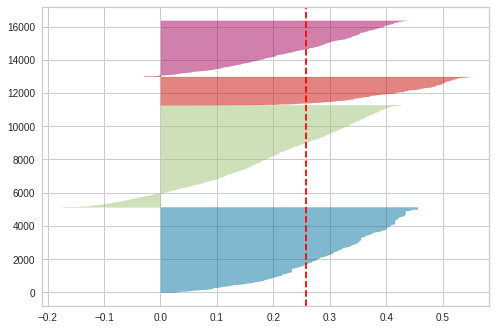

In [38]:
model4 = KMeans(4, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model4, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled)


/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

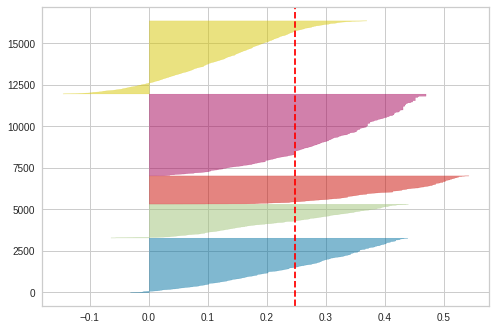

In [39]:
model5 = KMeans(5, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model5, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled)

Por mas que agrege mas clusters sigue existiendo un grupo de registros que siguen mal asignados a un clusters,
recordando la matrica de elbow en a que la suma de los errores daba bastante alto ahora pienso que esa "base" estaba alta dado
a este conjunto de registro que no terminan de "pertenecer" a ningun cluster.
Puede ser que estos registros sean outliers?

no creo que seguir agregando clusters sea la solucion, entonces en este caso me quedaria con 3 clustes por tener mejor indice de silueta y menor SSE